In [2]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import numpy as np
df=pd.read_csv('Default.csv')
df

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [10]:
df.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


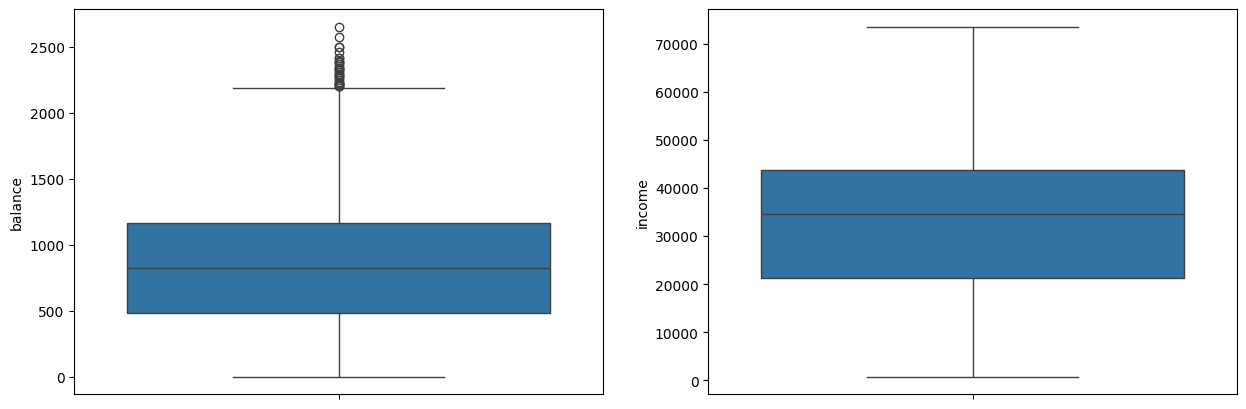

In [13]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1,2,1)
sns.boxplot(y=df['balance'])

pyplot.subplot(1,2,2)
sns.boxplot(y=df['income'])
pyplot.show()

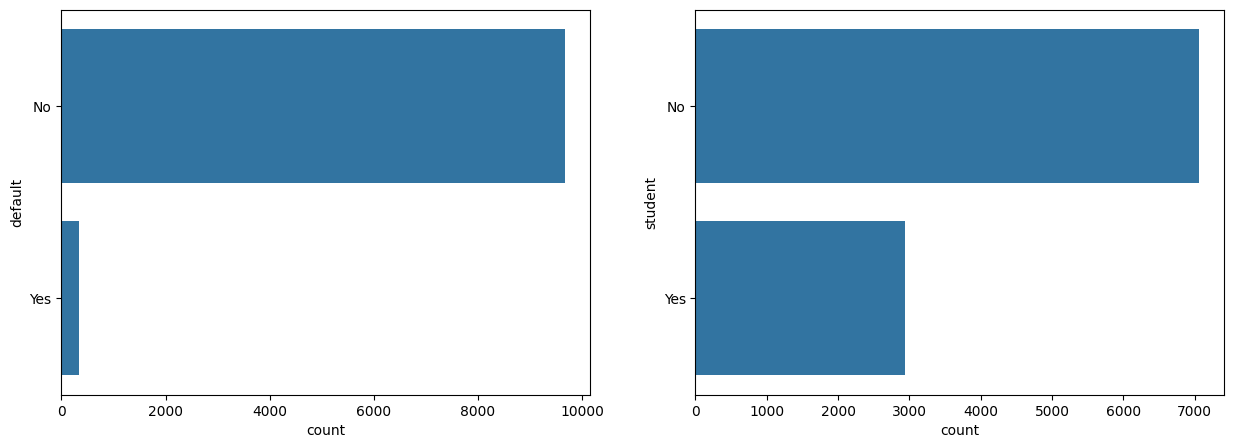

In [3]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1,2,1)
sns.countplot(y=df['default'])

pyplot.subplot(1,2,2)
sns.countplot(y=df['student'])
pyplot.show()

In [8]:
df['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [9]:
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [10]:
df['student'].value_counts(normalize=True)  #normalize means % data yes or no

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [11]:
df['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

In [12]:
df.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [13]:
Q1,Q3=df['balance'].quantile([.25,.75])  #.25--- 25% and .75---75%

In [14]:
#interquartile range
IQR=Q3-Q1
IQR

684.5772814213188

In [15]:
LL=Q1-1.5*(IQR)  #LL- lower limit
UL=Q3+1.5*(IQR)#UL-upper limit
UL

2193.1743086078154

In [16]:
#>UL===>outlier
df1=df[df['balance']>UL]
df1

,Unnamed: 0,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492253
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519752
1359,1360,Yes,No,2220.966201,40725.096207
1502,1503,Yes,Yes,2332.878254,11770.234124
1609,1610,Yes,Yes,2269.946966,18021.105948
2096,2097,Yes,Yes,2261.848162,20030.165119
2140,2141,No,Yes,2308.893236,19110.266412
2929,2930,Yes,Yes,2387.314867,28296.914718
3162,3163,Yes,Yes,2415.316994,17429.503375


In [17]:
df1['default'].count() #outlier

np.int64(31)

In [18]:
df1['default'].value_counts() #outlier

default
Yes    26
No      5
Name: count, dtype: int64

In [19]:
df1['default'].value_counts(normalize=True) #outlier

default
Yes    0.83871
No     0.16129
Name: proportion, dtype: float64

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

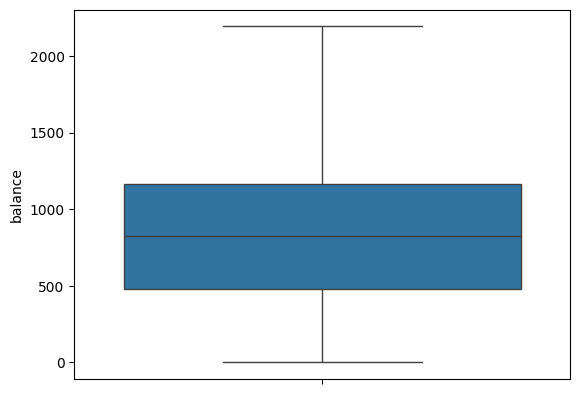

In [20]:
import numpy as np
df['balance']=np.where(df['balance']>UL,UL,df['balance'])
sns.boxplot(y=df['balance'])
pyplot.plot

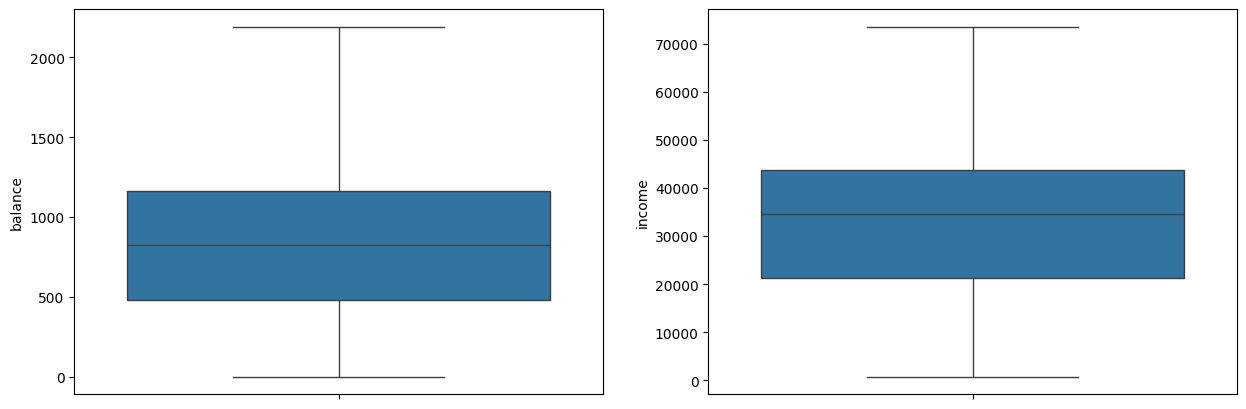

In [21]:
pyplot.figure(figsize=(15,5))
pyplot.subplot(1,2,1)
sns.boxplot(y=df['balance'])

pyplot.subplot(1,2,2)
sns.boxplot(y=df['income'])
pyplot.show()

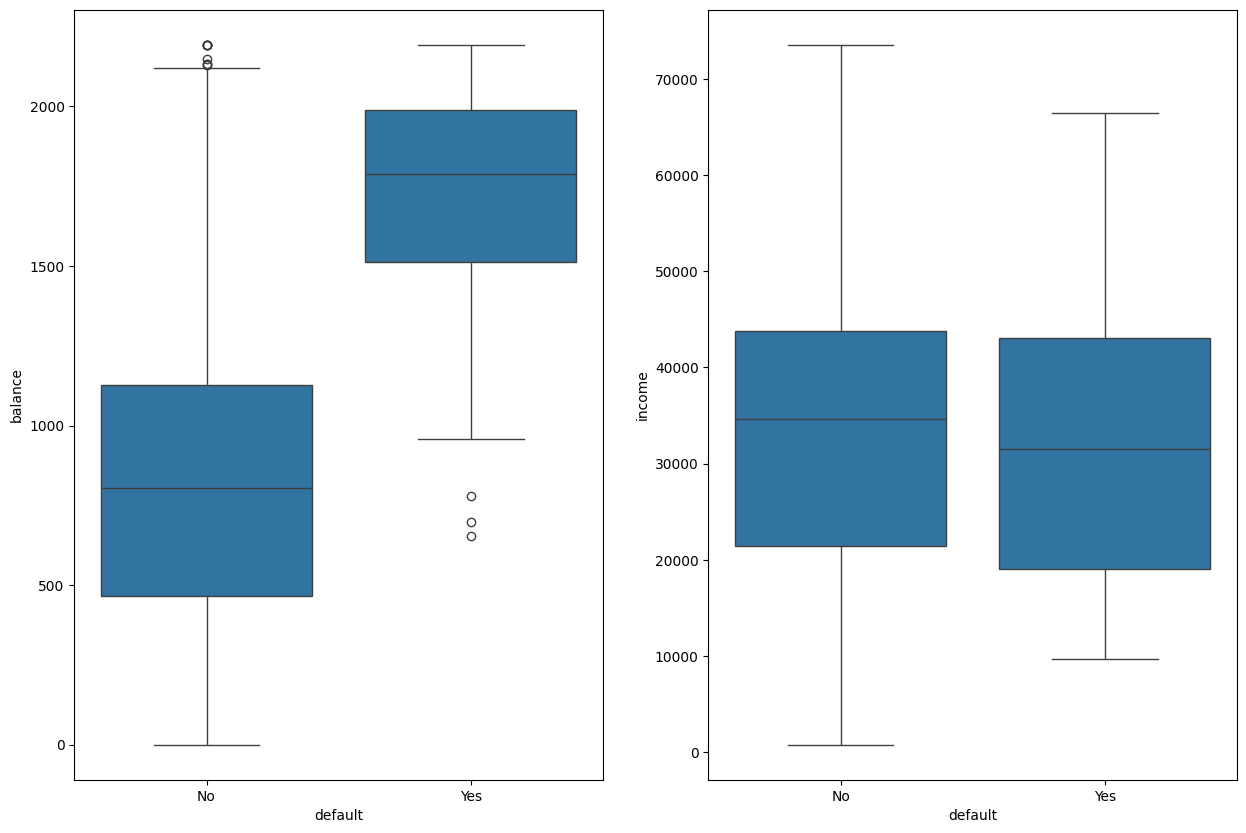

In [22]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(1,2,1)
sns.boxplot(x=df['default'],y=df['balance'])

pyplot.subplot(1,2,2)
sns.boxplot(x=df['default'],y=df['income'])
pyplot.show()

In [23]:
#replace yes/no by true false
df=pd.get_dummies(df,drop_first=True)
df.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,False,False
1,2,817.180407,12106.134700,False,True
2,3,1073.549164,31767.138947,False,False
3,4,529.250605,35704.493935,False,False
4,5,785.655883,38463.495879,False,False


In [24]:
#change column names
df.columns=['','balance','income','default','student']

In [25]:
df.head()

,,balance,income,default,student
0,1,729.526495,44361.625074,False,False
1,2,817.180407,12106.134700,False,True
2,3,1073.549164,31767.138947,False,False
3,4,529.250605,35704.493935,False,False
4,5,785.655883,38463.495879,False,False


In [26]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from sklearn.model_selection import train_test_split
x=df.drop('default',axis=1)
y=df['default']


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
print(x_train.shape)
print(x_test.shape)



(7000, 4)
(3000, 4)


In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=lr.predict(x_test)
y_pred

array([False, False, False, ..., False, False, False])

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[2890,   10],
       [  70,   30]])

In [40]:
(2890+30)/(2890+10+70+30) #accuracy

0.9733333333333334